In [1]:
import numpy as np

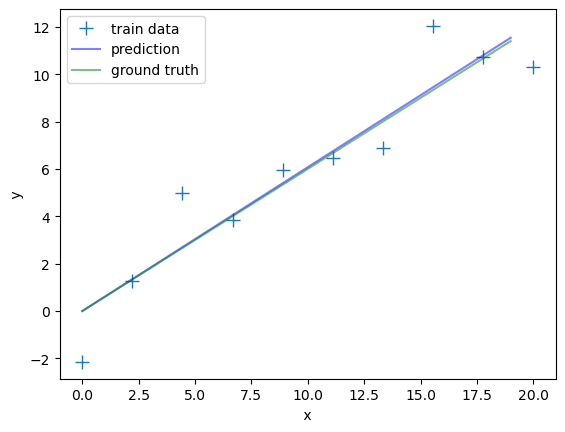

In [14]:
# Importo le librerie
import random
import matplotlib.pyplot as plt

# inizializzo le liste con le coppie di dati del dataset che verranno utilizzate per allenare il modello predittivo
x_train = [0., 2.22, 4.44, 6.67, 8.89, 11.11, 13.33, 15.56, 17.788, 20.0]   # valori dei dati indipendeti

y_train = [-2.1489976, 1.26684956, 5.00441023, 3.84220594, 5.95983884, 6.44189515,
           6.88238407, 12.04053287, 10.73255652, 10.29414663]               # risultati dei parametri dipendenti dalla x

# definisco la funzione del modello che segue l'equazione y=w*x
def modello (w,x):
    return w*x

# definisco la funzione della perdita che calcola l'MSE di un certo set di dati x,y con un certo peso w.
def loss (x,y,w):
    scarto=0.0
    for i in range(len(x)):
        scarto+=(y[i]-modello(w,x[i]))**2
    return scarto/len(x)

# inizializzo il numero di step k e il rate che verrà utilizzato per generare un nuovo w in un intorno di quello precedente
k=50
rate=0.1

# FASE DI ALLENAMENTO DEL MODELLO:
#------------------------------------------------------------------------------------------------------------------------------------
# genero il primo w e calcolo la sua perdità
w_star=random.random()
mse=loss(x_train,y_train,w_star)

# inizializzo il for sui k step che farò
for i in range(k):
    cas=2*random.random()-1               # genera tra (-1,1)
    w_new=w_star+cas*rate                 # genera il nuovo peso in un intorno di quello vecchio
    mse_new=loss(x_train,y_train,w_new)   # calcolo la perdita del nuovo peso

# ora verifico la condizione di disuguaglianza tra l'MSE nuovo e vecchio
    if mse_new < mse:
        w_star=w_new
        mse=mse_new

#----------------------------------------------------------------------------------------------------------------------------------------



# FASE DI TEST:
#-----------------------------------------------------------------------------------------------------------------------------------------
# inizializzo nuove liste di dati su cui farò il test
x_test=list(range(20))
y_pred=list([modello(x_test[i],w_star) for i in range(20)])   # Mi trovo le y predette tramite il mio modello allenato
y_atteso=list([modello(x_test[i],0.6) for i in range(20)])    # Mi trovo le y attese tramite il valore atteso del peso

# calcolo la perdita del test appena effettuato sul peso estratto dal modello allenato
mse_end=loss(x_test,y_pred,w_star)

#-----------------------------------------------------------------------------------------------------------------------------------------


# grafico i risultati ottenuti
plt.figure()
plt.plot(x_train, y_train, '+', markersize=10, label='train data')
plt.plot(x_test, y_pred, color='blue', alpha=0.5, label='prediction')
plt.plot(x_test, y_atteso, color='green', alpha=0.5, label='ground truth')
plt.xlabel(" x ")
plt.ylabel(" y ")
plt.legend()
plt.show()